## Question 1 - Data Acquisition

### Social media data, such as blogs, articles, news or Twitter posts, is much valuable for data science. However, how to obtain high-quality social media data becomes an important and challenging problem. Alternatively,we can collect the data by crowdsourcing, but it might be expensive. Therefore, we prefer to gather social media data by web scraping.Please try to crawl 20 pieces of social media data from social media websites. The data should satisfy following requirements:
1. Types of the article, blog, news or posts with its comments;  
2. We just need the textual information;  
3. Try to clean the data, i.e., removing all HTML tags.  
We provide some social media websites that you can take a try.  
• https://english.news.cn  
• https://www.bbc.com/news  
• https://medium.com  
• https://twitter.com  
Please submit your code and the obtained social media data. 


**solution:**

In [19]:
import requests as r
from bs4 import BeautifulSoup
import re
import os

# get the html page of the xinhuawang
url=r"https://english.news.cn"
res=r.get(url)
html=res.text
bf=BeautifulSoup(html,'lxml')

# get the hyper-reference from the html page
# use the Regex to identify the correct link and append the link to the list
hrefs=[]
for item in bf.find_all("a"):
    href=item.get('href')
    http_pattern = re.compile(r'^https?://')
    if http_pattern.match(href):
        hrefs.append(href)

# print(hrefs)
title=0

# get the article of the link
for href_crwal in hrefs:
    response=r.get(href_crwal,verify=False)
    title+=1 # to name the article
    if response.status_code==200:
        html_crwal=response.text
        bf_crwal = BeautifulSoup(html_crwal, 'lxml')
        text = bf_crwal.get_text()
        folder_path = "./text"
        # create the folder
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        # set the file name and the path
        file_name = str(title)+".txt"
        file_path = os.path.join(folder_path, file_name)

        # save the text to the file
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(text)

# for test one link
# res_test=r.get("https://english.cctv.com")
# html_test=res_test.text
# bf_test=BeautifulSoup(html_test,'lxml')
# text=bf_test.get_text()
# print(text)

d:\anaconda\envs\data-engineer\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
d:\anaconda\envs\data-engineer\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
d:\anaconda\envs\data-engineer\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
d:\anaconda\envs\data-engineer\lib\site-packages\urllib3\c

ProxyError: HTTPSConnectionPool(host='www.cma.gov.cn', port=443): Max retries exceeded with url: /en2014 (Caused by ProxyError('Cannot connect to proxy.', ConnectionResetError(10054, '远程主机强迫关闭了一个现有的连接。', None, 10054, None)))

## Question 2 - Data Preprocessing

### Regular Expressions, abbreviated as Regex or Regexp, are a string of characters created within the framework of Regex syntax rules. You can easily manage your data with Regex, which uses commands like finding, matching, and editing. Regex is an important tool during the data preprocessing stage.


**solution:**

In [7]:
import re

In [8]:
# Write the pattern to check that a string only contains a certain set of characters (in this case a-zA-Z and 0-9).
#- Test cases: ABCDEFabcdef123450 and ABCD@Fabcdef123450
# test 1
pattern1=r'[^a-zA-z0-9]'
input1 = "ABCDEFabcdef123450"
input2 = "BCD@Fabcdef123450"

print(re.search(pattern1,input2))

<re.Match object; span=(3, 4), match='@'>


In [9]:
# Write the pattern that matches a string that has an ‘a’ followed by one or more ‘b’.
# - Test cases: bab, abbbbb and baaaa
# test 2
pattern2=r'ab+'
input3=["bab","abbbbb","baaaa"]
i=0
for i in range(len(input3)):
    print(re.search(pattern2,input3[i]))

<re.Match object; span=(1, 3), match='ab'>
<re.Match object; span=(0, 6), match='abbbbb'>
None


In [10]:
# Write the pattern to check whether a string starts and ends with a specific number (in this case 6).
# - Test cases: 65117896, 78238936 and 56666665
# test 3
pattern3=r'^6.*6$'
input4=["65117896","78238936","56666665"]
i=0
for i in range(len(input4)):
    print(re.findall(pattern3,input4[i]))

['65117896']
[]
[]


In [11]:
# Write the pattern to search the number (0-9) of length between 2-4 in a given string.
# - Test cases: Exercises number 1, 23, 345, and 45678 are important
# test 4
pattern4=r'\b\d{2,4}\b'
input5="xercises number 1, 23, 345, and 45678 are important"
print(re.findall(pattern4,input5))

['23', '345']


In [12]:
# Write the pattern to remove leading zeros from an IP address.
# - Test cases: 210.08.090.194 and 010.01.010.100
# test 5
pattern5=r'\b0+(\d+)'
input6=["010.01.010.100","210.08.090.194"]
i=0
for i in range(len(input6)):
    input6[i]=re.sub(pattern5,r'\1',input6[i])
print(input6)

['10.1.10.100', '210.8.90.194']


In [14]:
# Write the pattern to replace whitespaces with an underscore and vice versa.
# - Test cases: Python Exercises Of Regular Expression
# test 6
pattern6=r'[ _]'
input7="Python Exercises Of Regular_Expression"
input7=re.sub(pattern6, lambda x: '_' if x.group(0) == ' ' else ' ', input7)
print(input7)

Python_Exercises_Of_Regular Expression


In [15]:
# Write the pattern to convert the date of yyyy-mm-dd format to dd-mm-yyyy format.
# - Test cases: 2022-09-10
# test 7
pattern7=r'(\d{4})-(\d{2})-(\d{2})'
input8="2022-09-10"
input8=re.sub(pattern7,r'\3-\2-\1',input8)
print(input8)

10-09-2022


In [16]:
# Write the pattern to find all words starting with ‘a’ and ‘e’.
# - Test cases: The following example creates an ArrayList with a capacity of 50 elements. Four elements are then
# added to the ArrayList and the ArrayList is trimmed accordingly.
# test 8
pattern8=r'\b[aeAE]\w+'
input9="The following example creates an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly"
re.findall(pattern8,input9)
print(re.findall(pattern8,input9))

['example', 'an', 'ArrayList', 'elements', 'elements', 'are', 'added', 'ArrayList', 'and', 'ArrayList', 'accordingly']


In [17]:
# Write the pattern to extract values between quotation marks of a string.
# - Test cases: Regex can be used in programming languages such as “Python”, “SQL”, “Javascript”, “R”, “Google
# Analytics”, “Google Data Studio”, and throughout the coding process.
#test 9
pattern9=r'“(.*?)”'
input10="Regex can be used in programming languages such as “Python”, “SQL”, “Javascript”, “R”, “Google Analytics”, “Google Data Studio”, and throughout the coding process."
print(re.findall(pattern9,input10))

['Python', 'SQL', 'Javascript', 'R', 'Google Analytics', 'Google Data Studio']


In [18]:
# Write the pattern to find urls in a string.
# - Test cases: Find more Examples at Github https://www.github.com or W3School https://www.w3schools.com/.
#test 10
pattern10=r'https?://\S+'
input11="Find more Examples at Github https://www.github.com or W3School https://www.w3schools.com/"
print(re.findall(pattern10,input11))

['https://www.github.com', 'https://www.w3schools.com/']


## Question 3 - Data Processing

### 1. Please convert the data in this file to the line-based text with your own Python codes. You should submit your runnable codes and output file.

**solution:**

In [3]:
import xml.etree.ElementTree as et
import subword_nmt

input_xml="sample-src.xml"
output_txt="output.txt"

tree=et.parse(input_xml)
root=tree.getroot()

# # for test
# for child in root.iter():
#     print(child.text)
# print(root.iter())

# convert the data to the line-based text
with open(output_txt,"w",encoding="utf-8") as f:
    for child in root.iter():
        if(child.text):
            f.write(child.text+"\n")

## 2. After you obtain the line-based text file, please create a BPE vocabulary (save each BPE token line by line) with subword-nmt. You should submit your runnable codes and output file.

**solution:**

In [6]:
!subword-nmt learn-bpe -s 10000 < output.txt > bpe.en


 58%|#####7    | 5754/10000 [00:08<00:01, 2387.23it/s]no pair has frequency >= 2. Stopping

 58%|#####7    | 5790/10000 [00:08<00:06, 673.96it/s] 


<!-- <span style="font-size: 18px;">Question4</span>   -->
## Question 4 - Data Visualization
### 1. Assume we have a set of user profiles, including user id (Integer;1-200), sex (Binary;Male/Female), age(Integer;18-100), height (Float;100.0-200.0) and weight (Float;30.0-100.0), we intend to analyze these attributesby visualization. Which visualization technique should be selected for different attributes?

**Solution:**  
For sex, we can use the pie chart to show the percentage of each sex.  
For age, we can use the histogram to show the distribution of age.  
For height and wight, we can also use the histogram or the heat map to show the distribution of height and wight.  
We can also use the scatter plot to show the relationship between user_id and age.  
Heatmap can also be used to show the relationship between height, weight and age.

### 2. Write a Python Program to randomly generate 200 user profiles following above descriptions and visualize thegenerated data using your selected techniques.

**Solution:**  


generate data

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# generate 200 user profiles randomly
num=200
user_profiles=[]
for i in range(num):
    id_tmp=i+1
    sex_tmp=random.choice(["Male","Female"])
    age_tmp=random.randint(18,100)
    height_tmp=random.uniform(100.0,200.0)
    weight_tmp=random.uniform(30.0,100.0)
    
    user_profiles.append({
        'id':id_tmp,
        'sex':sex_tmp,
        'age':age_tmp,
        'height':height_tmp,
        'weight':weight_tmp
    })
# print(user_profiles)

visualize data  
visualize sex distribution by pie chart

In [ ]:
# visualize the data

# visualize the sex by the pie chart
df_raw=pd.DataFrame(user_profiles)
df_sex=df_raw.groupby('sex').size()
df_sex.plot(kind='pie',subplots=True,figsize=(8,8))
plt.title("Pie Chart of Sex")
plt.ylabel("")

visualize age distribution by histogram

In [ ]:
plt.hist(df_raw['age'],bins=25,color='steelblue',edgecolor='black',linewidth=0.5)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

visualize age and user_id by scatter plot

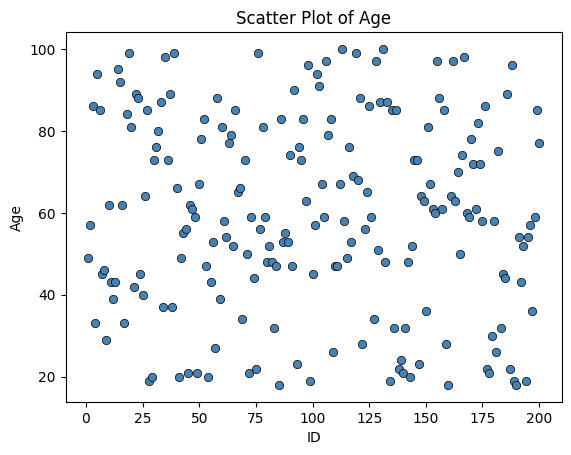

In [7]:
plt.scatter(df_raw['id'],df_raw['age'],color='steelblue',edgecolor='black',linewidth=0.5)
plt.title("Scatter Plot of Age")
plt.xlabel("ID")
plt.ylabel("Age")
plt.show()

visualize the distribution of height and weight by histogram

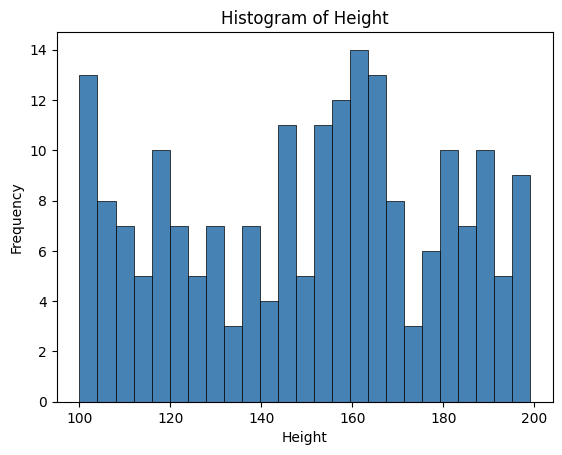

In [8]:
plt.hist(df_raw['height'],bins=25,color='steelblue',edgecolor='black',linewidth=0.5)
plt.title("Histogram of Height")
plt.xlabel("Height")
plt.ylabel("Frequency")
# sns.heatmap(df_corr['height'],annot=True,cmap='YlGnBu')
plt.show()

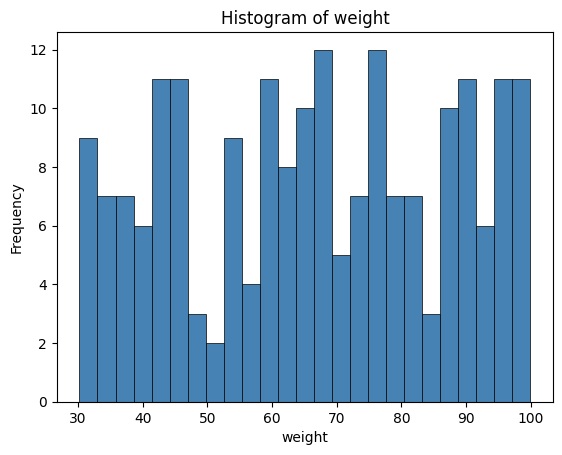

In [9]:
plt.hist(df_raw['weight'],bins=25,color='steelblue',edgecolor='black',linewidth=0.5)
plt.title("Histogram of weight")
plt.xlabel("weight")
plt.ylabel("Frequency")
# sns.heatmap(df_corr['height'],annot=True,cmap='YlGnBu')
plt.show()

heat map of height and weight and age

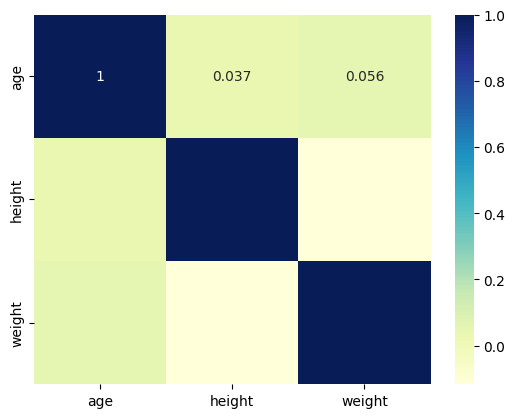

In [10]:
subset=df_raw[['age','height','weight']]
sns.heatmap(subset.corr(),annot=True,cmap='YlGnBu')
plt.show()

### 3.Attention is a classic and popular technique in natural language processing. Please randomly initialize Q and K vectors and visualize the attention score via heatmap.

**solution:**

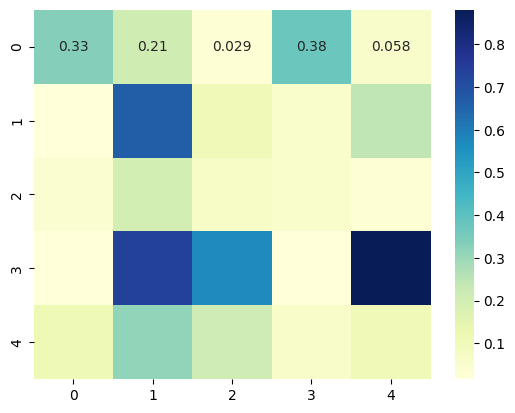

In [19]:
import numpy as np

# generate 5*10 matrix Q and 5*10 matrix K
Q=np.random.rand(5,10)
K=np.random.rand(5,10)
d_k = np.sqrt(10)

# calculate the attention score

# calculate the product of Q and K
product=np.dot(Q,K.T)/d_k

# calculate the softmax of the product
attention_scores = np.exp(product) / np.sum(np.exp(product),axis=1)

# draw the heatmap of the attention score
sns.heatmap(attention_scores,annot=True,cmap='YlGnBu')
plt.show()